In [1]:
import seaborn
import numpy as np
import pandas as pd
import ranking as r
import matplotlib.pyplot as plt
import validate_model as vm
import create_model as cm
%matplotlib inline 
%run first_model.py
%load_ext autoreload
%autoreload 2

A newer version of GraphLab Create (v1.6) is available! Your current version is v1.5.2.
New features in 1.6:
- Time Series data type
- Model tuning in Canvas
- Churn prediction toolkit
- Product sentiment analysis toolkit
- DBSCAN for clustering toolkit
- Record linker for data matching toolkit
- Frequent pattern mining toolkit
- Support adaptive Predictive Services model serving through endpoint policies
- Distributed Machine Learning in EC2
- Interface between DataFrames and SFrames in scala

Notable performance improvements:
- Improve service latency for all supervised learning models
- Improved performance of nearest neighbor toolkit by constructing a similarity graph directly
- Fast approximation of nearest neighbors through locality-sensitive hashing
- More efficient and faster access of data in S3
- Improved performance of distributed graph analytics

For detailed release notes please visit:
https://dato.com/download/release-notes.html

-
You can use pip to upgrade the graphlab-

PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Preparing data set.
PROGRESS:     Data has 214289 observations with 29096 users and 64 items.
PROGRESS:     Data prepared in: 0.112374s
PROGRESS: Training factorization_recommender for recommendations.
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | Parameter                      | Description                                      | Value    |
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | num_factors                    | Factor Dimension                                 | 1        |
PROGRESS: | regularization                 | L2 Regularization on Factors                     | 0        |
PROGRESS: | solver                         | Solver used for training                         | sgd      |
PROGRESS: | nmf                            | Use Non-Negative Factors                

In [2]:
athlete_ratings, segment_ratings, models = cm.df_to_latent_features(training_df)

PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Preparing data set.
PROGRESS:     Data has 214289 observations with 29096 users and 64 items.
PROGRESS:     Data prepared in: 0.104386s
PROGRESS: Training factorization_recommender for recommendations.
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | Parameter                      | Description                                      | Value    |
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | num_factors                    | Factor Dimension                                 | 1        |
PROGRESS: | regularization                 | L2 Regularization on Factors                     | 0        |
PROGRESS: | solver                         | Solver used for training                         | sgd      |
PROGRESS: | nmf                            | Use Non-Negative Factors                

In [3]:
vm.testing_rmse(models, training_df)

{'downhill': 0.62429019587384993,
 'total': 0.47622232060335074,
 'uphill': 0.26054112500991}

In [4]:
vm.evaluate_latent_feature_correlations(training_df, segment_ratings)

,total_rating,uphill_rating,downhill_rating
seg_average_grade,-0.500992,-0.733265,0.386419
seg_distance,0.064269,0.168567,0.539370
seg_maximum_grade,-0.212770,-0.167005,-0.291079
total_rating,1.000000,0.998050,0.999774
uphill_rating,0.998050,1.000000,NaN
downhill_rating,0.999774,NaN,1.000000


In [16]:
lb = r.Leaderboards(training_df[['athlete_id', 'segment_id', 'seg_average_grade', 'average_speed']])
athlete_boards = lb.get('athlete', athlete_ratings, board_size='all')

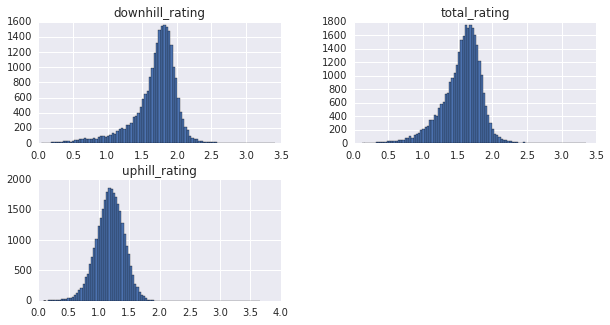

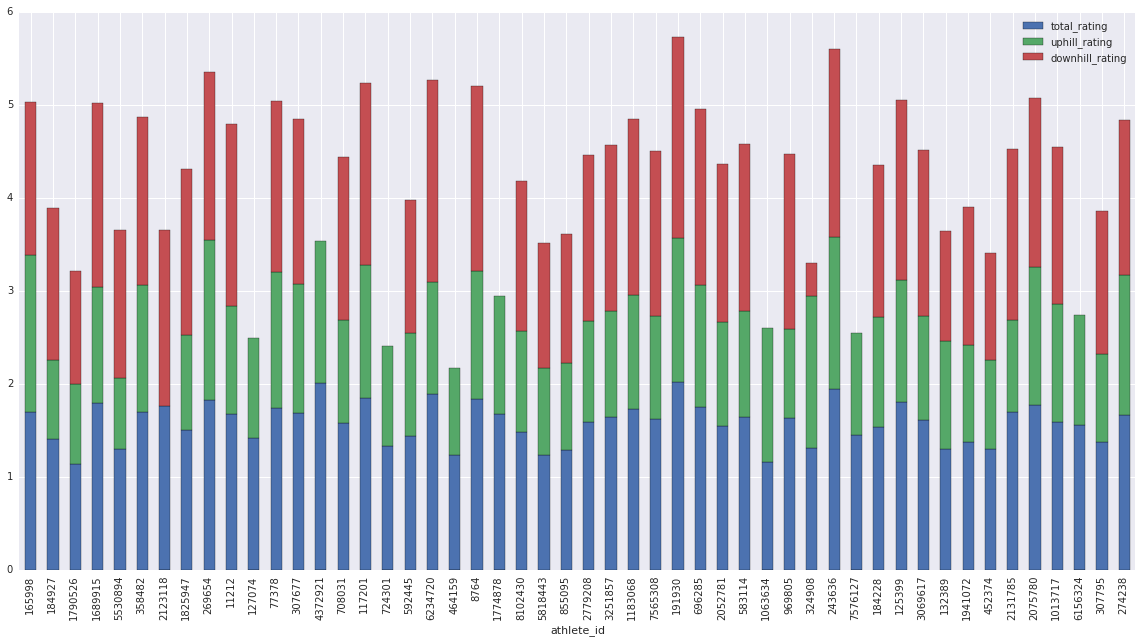

In [6]:
vm.plot_ratings(athlete_ratings)

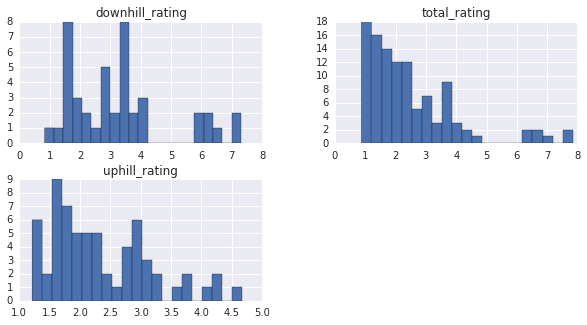

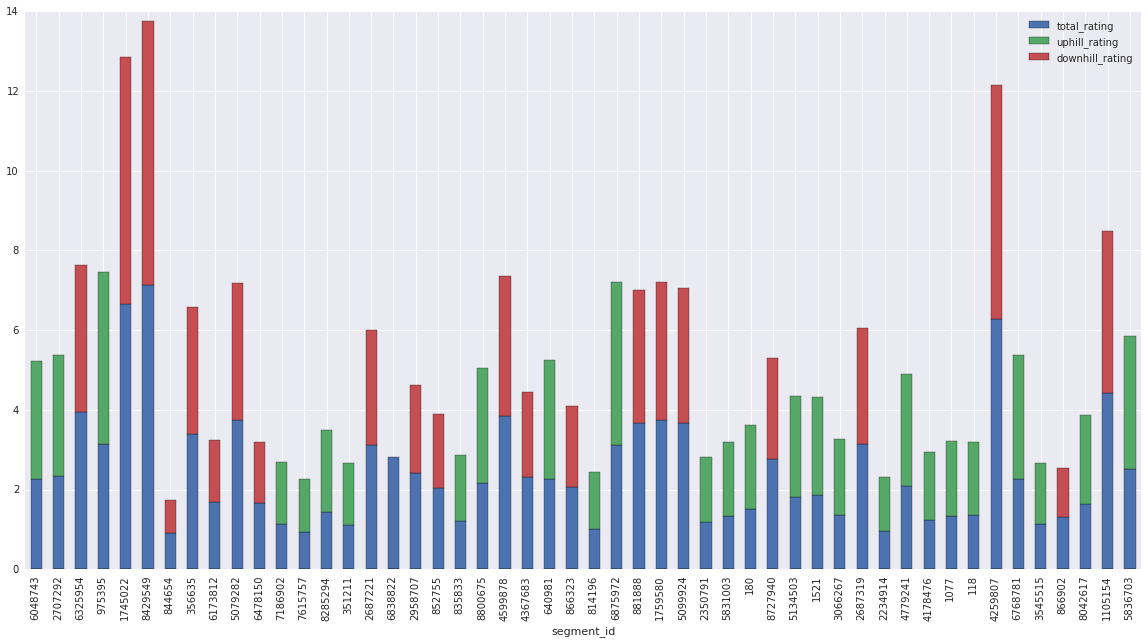

In [7]:
vm.plot_ratings(segment_ratings)

In [8]:
training_df.query('athlete_id == 2510671').average_speed.mean()

3.2653923157764084

In [9]:
segment_ratings.min()

total_rating       0.873280
uphill_rating      1.207617
downhill_rating    0.829233
dtype: float64

In [10]:
athlete_ratings.ix[6637281]

total_rating       1.565577
uphill_rating      1.177092
downhill_rating    1.551606
Name: 6637281, dtype: float64

In [11]:
(segment_ratings.uphill_rating > -.28).mean()

0.58715596330275233

In [12]:
print(segment_ratings.ix[975395])
print(segment_ratings.ix[651728])
print((segment_ratings.uphill_rating>4.88).mean())
print((segment_ratings.total_rating>-0.42).mean())

total_rating       3.153291
uphill_rating      4.318248
downhill_rating         NaN
Name: 975395, dtype: float64
total_rating       1.873267
uphill_rating      2.560734
downhill_rating         NaN
Name: 651728, dtype: float64
0.0
1.0


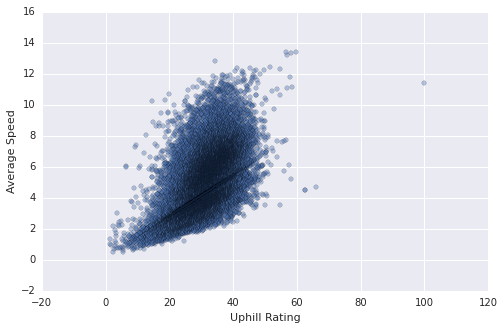

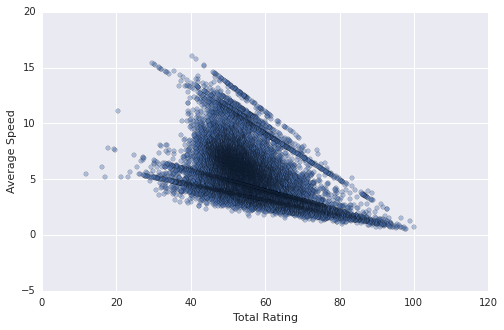

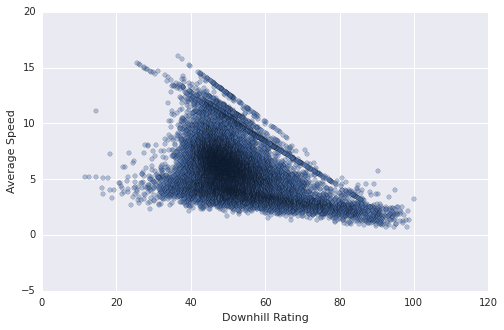

In [17]:
for rating in ['uphill_rating', 'total_rating', 'downhill_rating']:
    athlete_boards[rating].reset_index().plot(kind='scatter', x=rating, y='average_speed', alpha=0.4, figsize=(8, 5))
    plt.ylabel('Average Speed')
    plt.xlabel(rating.replace('_', ' ').title())

In [ ]:
df.query('segment_id == 5642079').average_speed.mean()

In [ ]:
athlete_ratings.total_rating.hist(bins=100, figsize=(15, 8))
plt.title('Total Rating')
plt.xlabel('NMF Rating')
plt.ylabel('Number of Athletes')
plt.xlim(0,3)

In [ ]:
training_df.average_speed.std()